### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Weightlifting']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 11756    Weightlifting
11757    Weightlifting
11758    Weightlifting
11759    Weightlifting
11760    Weightlifting
             ...      
12217    Weightlifting
12218    Weightlifting
12219    Weightlifting
12220    Weightlifting
12221    Weightlifting
Name: Sport, Length: 466, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 11756        NA
11757        NA
11758        NA
11759        NA
11760        NA
          ...  
12217    Silver
12218    Silver
12219    Silver
12220        NA
12221      Gold
Name: Medal, Length: 466, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 11756 to 12221
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      466 non-null    int64  
 1   Unnamed: 0_x    466 non-null    int64  
 2   ID              466 non-null    int64  
 3   Name            466 non-null    object 
 4   Sex             466 non-null    object 
 5   Age             466 non-null    float64
 6   Height          466 non-null    float64
 7   Weight          466 non-null    float64
 8   NOC             466 non-null    object 
 9   Games           466 non-null    object 
 10  Year            466 non-null    int64  
 11  Season          466 non-null    object 
 12  City            466 non-null    object 
 13  Sport           466 non-null    object 
 14  Event           466 non-null    object 
 15  Medal           466 non-null    object 
 16  Team            466 non-null    object 
 17  Unnamed: 0_y    466 non-null 

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (349, 1) (349, 5)
Test Set  : (117, 1) (117, 5)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Height,GDP,Population,GDP Per Capita,Medal
11802,25.0,152.0,4.600000e+12,1.324655e+09,3472.602300,Gold
12099,28.0,178.0,1.860000e+13,3.231275e+08,57562.414996,Bronze
12136,26.0,177.0,7.370000e+08,2.839000e+07,25.959845,NA
12117,29.0,162.0,1.800000e+12,2.076529e+08,8668.312860,NA
11893,20.0,170.0,7.650000e+11,4.808000e+07,15910.981697,Silver
...,...,...,...,...,...,...
11919,20.0,173.0,1.829199e+10,1.488363e+07,1229.000958,NA
12012,24.0,158.0,1.800000e+11,4.625820e+07,3891.201992,NA
11808,19.0,158.0,2.080000e+11,2.053788e+07,10127.630049,NA
11863,23.0,160.0,1.370000e+11,1.779703e+07,7697.912776,Bronze


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        361
Silver     35
Gold       35
Bronze     35
Name: Medal, dtype: int64


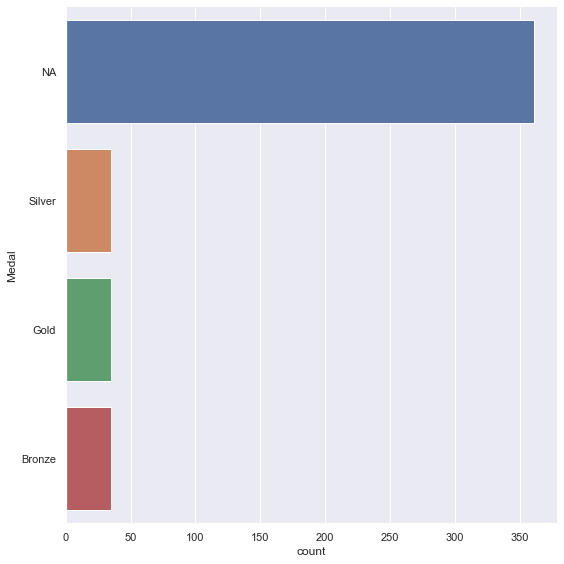

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(349, 5) (349, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1072, 5) (1072, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Height,GDP,Population,GDP Per Capita,Medal
0,25.000000,152.000000,4.600000e+12,1.324655e+09,3472.602300,Gold
1,28.000000,178.000000,1.860000e+13,3.231275e+08,57562.414996,Bronze
2,26.000000,177.000000,7.370000e+08,2.839000e+07,25.959845,NA
3,29.000000,162.000000,1.800000e+12,2.076529e+08,8668.312860,NA
4,20.000000,170.000000,7.650000e+11,4.808000e+07,15910.981697,Silver
...,...,...,...,...,...,...
1067,20.180185,166.828798,1.333604e+11,1.586527e+07,8414.444056,Silver
1068,21.623845,159.376155,1.876210e+09,2.457157e+07,80.327476,Silver
1069,19.976698,164.046604,5.455359e+11,1.254852e+08,4548.986526,Silver
1070,24.503806,171.278547,1.258052e+11,1.429288e+07,8933.045825,Silver


In [18]:
X_test

,Age,Height,GDP,Population,GDP Per Capita
11990,19.0,152.0,1.323084e+10,6.149928e+06,2151.382047
12142,28.0,160.0,2.314159e+10,9.730146e+06,2378.339207
11782,21.0,163.0,1.288135e+10,2.947314e+06,4370.539647
12146,21.0,154.0,4.070000e+11,6.886351e+07,5910.241525
12130,19.0,150.0,5.182157e+10,2.977450e+07,1740.468298
...,...,...,...,...,...
11945,36.0,148.0,7.000000e+11,1.126136e+09,621.594673
12028,28.0,154.0,1.030000e+13,2.821624e+08,36503.799225
12073,27.0,164.0,2.600000e+11,1.465966e+08,1773.575078
12051,25.0,155.0,1.760000e+11,4.559330e+07,3860.216304


Number of Medal Types : 4
Bronze    268
Gold      268
NA        268
Silver    268
Name: Medal, dtype: int64


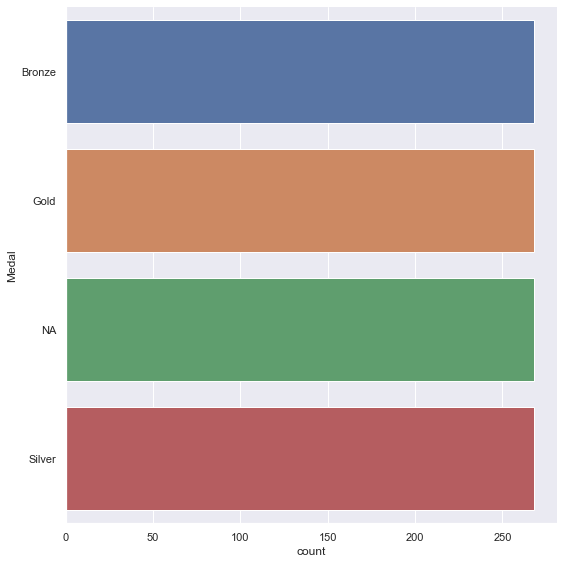

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (804, 1) (804, 5)
Test Set  : (268, 1) (268, 5)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9651741293532339

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8097014925373134



<AxesSubplot:>

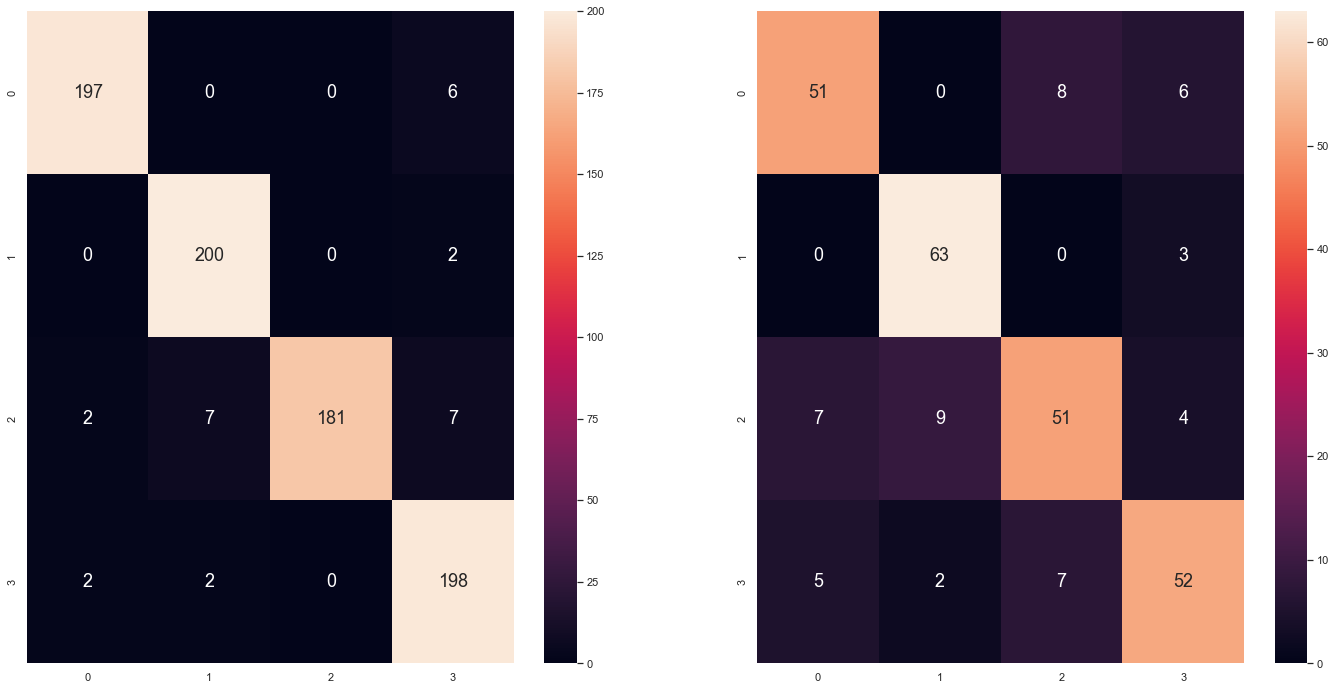

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

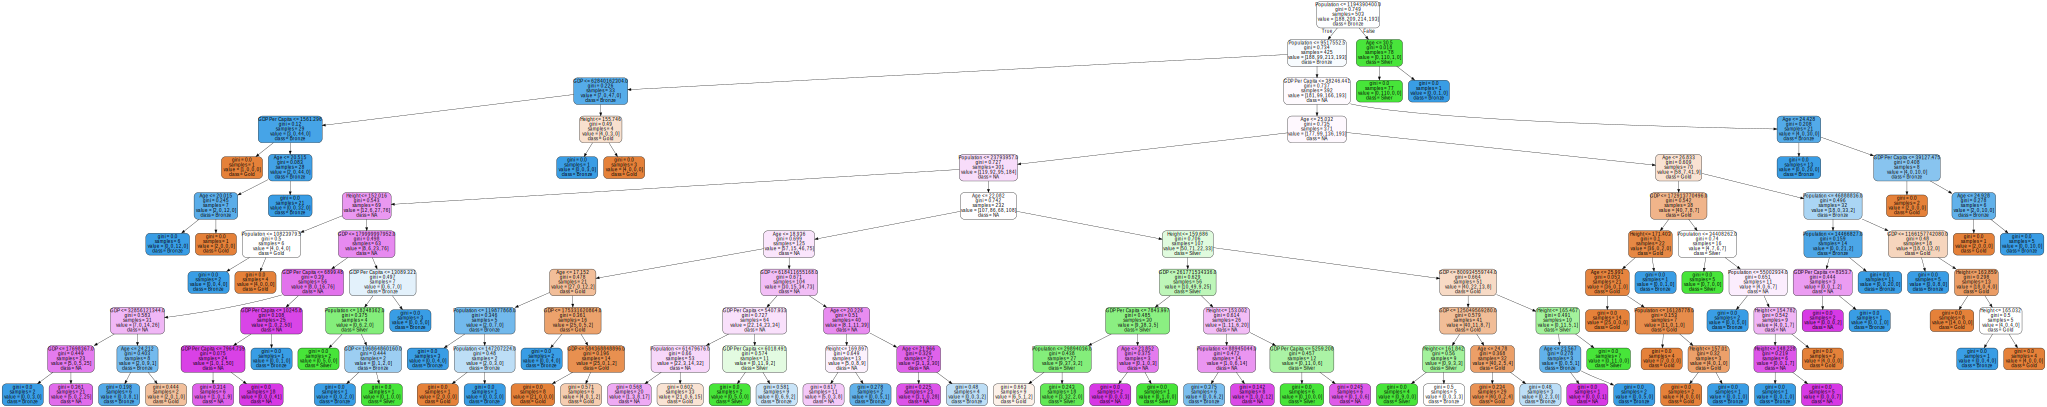

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_WEIGHTLIFTING")

'Tree_female_WEIGHTLIFTING.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.6666666666666666


<AxesSubplot:>

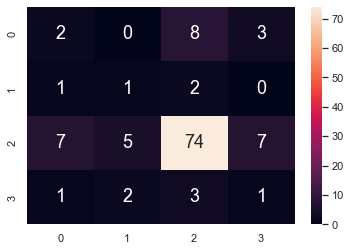

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})